#  Using a Public API with Python

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0f654695-dae0-42a9-8912-4aa6f676b55b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-14T14:01:25.742Z', 'error_code': 0, 'error_message': None, 'elapsed': 62, 'credit_count': 25, 'notice': None, 'total_count': 10202}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [2]:
type((data))

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [5]:
pd.json_normalize(data['status'])

timestamp  error_code error_message  elapsed  credit_count  \
0  2023-07-14T14:01:25.742Z           0          None       62            25   

  notice  total_count  
0   None        10202

In [8]:
pd.json_normalize(data['data'])

id                 name symbol                 slug  \
0         1              Bitcoin    BTC              bitcoin   
1      1027             Ethereum    ETH             ethereum   
2       825               Tether   USDT               tether   
3        52                  XRP    XRP                  xrp   
4      1839                  BNB    BNB                  bnb   
...     ...                  ...    ...                  ...   
4995   8678                EHash  EHASH                ehash   
4996  12979      Sentre Protocol   SNTR      sentre-protocol   
4997   7816          Basis Share    BAS          basis-share   
4998  20777  Firebird Aggregator    FBA  firebird-aggregator   
4999   8141        Mithril Share    MIS        mithril-share   

      num_market_pairs                date_added  \
0                10342  2010-07-13T00:00:00.000Z   
1                 7120  2015-08-07T00:00:00.000Z   
2                56941  2015-02-25T00:00:00.000Z   
3                  991  2013-08-04T00:00:00.000Z   
4                 1504  2017-07-25T00:00:00.000Z   
...                ...                       ...   
4995                 3  2021-03-03T00:00:00.000Z   
4996                 3  2021-10-21T15:11:08.000Z   
4997                 6  2020-11-30T00:00:00.000Z   
4998                 6  2022-06-27T13:38:57.000Z   
4999                 5  2020-12-30T00:00:00.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...           NaN   
...                                                 ...           ...   
4995                                                 []  2.000000e+07   
4996                                                 []  1.000000e+09   
4997         [defi, yield-farming, rebase, seigniorage]           NaN   
4998                                                 []  2.100000e+07   
4999                       [yield-farming, seigniorage]           NaN   

      circulating_supply       total_supply  infinite_supply  platform  \
0           1.942908e+07           19429081            False       NaN   
1           1.202047e+08   120204712.077165             True       NaN   
2           8.343409e+10  86730981418.02774             True       NaN   
3           5.254409e+10        99988621362            False       NaN   
4           1.558490e+08   155849042.759793            False       NaN   
...                  ...                ...              ...       ...   
4995        0.000000e+00                  0            False       NaN   
4996        0.000000e+00         1000000000            False       NaN   
4997        0.000000e+00                  0            False       NaN   
4998        0.000000e+00                  0            False       NaN   
4999        0.000000e+00            1000001            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                               NaN                       NaN   
4996      4997                      1.744270e+08             229750.360272   
4997      4998                               NaN                       NaN   
4998      4999                               NaN                     

In [9]:
pd.json_normalize(data['data'])
pd.to_datetime(('now'))

Timestamp('2023-07-14 16:05:45.953643')

In [10]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime(('now'))
df

id                 name symbol                 slug  \
0         1              Bitcoin    BTC              bitcoin   
1      1027             Ethereum    ETH             ethereum   
2       825               Tether   USDT               tether   
3        52                  XRP    XRP                  xrp   
4      1839                  BNB    BNB                  bnb   
...     ...                  ...    ...                  ...   
4995   8678                EHash  EHASH                ehash   
4996  12979      Sentre Protocol   SNTR      sentre-protocol   
4997   7816          Basis Share    BAS          basis-share   
4998  20777  Firebird Aggregator    FBA  firebird-aggregator   
4999   8141        Mithril Share    MIS        mithril-share   

      num_market_pairs                date_added  \
0                10342  2010-07-13T00:00:00.000Z   
1                 7120  2015-08-07T00:00:00.000Z   
2                56941  2015-02-25T00:00:00.000Z   
3                  991  2013-08-04T00:00:00.000Z   
4                 1504  2017-07-25T00:00:00.000Z   
...                ...                       ...   
4995                 3  2021-03-03T00:00:00.000Z   
4996                 3  2021-10-21T15:11:08.000Z   
4997                 6  2020-11-30T00:00:00.000Z   
4998                 6  2022-06-27T13:38:57.000Z   
4999                 5  2020-12-30T00:00:00.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...           NaN   
...                                                 ...           ...   
4995                                                 []  2.000000e+07   
4996                                                 []  1.000000e+09   
4997         [defi, yield-farming, rebase, seigniorage]           NaN   
4998                                                 []  2.100000e+07   
4999                       [yield-farming, seigniorage]           NaN   

      circulating_supply       total_supply  infinite_supply  platform  \
0           1.942908e+07           19429081            False       NaN   
1           1.202047e+08   120204712.077165             True       NaN   
2           8.343409e+10  86730981418.02774             True       NaN   
3           5.254409e+10        99988621362            False       NaN   
4           1.558490e+08   155849042.759793            False       NaN   
...                  ...                ...              ...       ...   
4995        0.000000e+00                  0            False       NaN   
4996        0.000000e+00         1000000000            False       NaN   
4997        0.000000e+00                  0            False       NaN   
4998        0.000000e+00                  0            False       NaN   
4999        0.000000e+00            1000001            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                               NaN                       NaN   
4996      4997                      1.744270e+08             229750.360272   
4997      4998                               NaN                       NaN   
4998      4999                               NaN                     

In [27]:

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0f654695-dae0-42a9-8912-4aa6f676b55b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Marc\Desktop\API folder\APIfile.csv'):
        df.to_csv(r'C:\Users\Marc\Desktop\API folder\APIfile.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Marc\Desktop\API folder\APIfile.csv',mode='a', header=False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60)
exit()

In [ ]:
df72 = pd.read_csv(r'C:\Users\Marc\Desktop\API folder\APIfile.csv')
df72

In [24]:
df

id                 name symbol                 slug  \
0         1              Bitcoin    BTC              bitcoin   
1      1027             Ethereum    ETH             ethereum   
2       825               Tether   USDT               tether   
3        52                  XRP    XRP                  xrp   
4      1839                  BNB    BNB                  bnb   
...     ...                  ...    ...                  ...   
4995   8678                EHash  EHASH                ehash   
4996  12979      Sentre Protocol   SNTR      sentre-protocol   
4997   7816          Basis Share    BAS          basis-share   
4998  20777  Firebird Aggregator    FBA  firebird-aggregator   
4999   8141        Mithril Share    MIS        mithril-share   

      num_market_pairs                date_added  \
0                10342  2010-07-13T00:00:00.000Z   
1                 7120  2015-08-07T00:00:00.000Z   
2                56941  2015-02-25T00:00:00.000Z   
3                  991  2013-08-04T00:00:00.000Z   
4                 1504  2017-07-25T00:00:00.000Z   
...                ...                       ...   
4995                 3  2021-03-03T00:00:00.000Z   
4996                 3  2021-10-21T15:11:08.000Z   
4997                 6  2020-11-30T00:00:00.000Z   
4998                 6  2022-06-27T13:38:57.000Z   
4999                 5  2020-12-30T00:00:00.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...           NaN   
...                                                 ...           ...   
4995                                                 []  2.000000e+07   
4996                                                 []  1.000000e+09   
4997         [defi, yield-farming, rebase, seigniorage]           NaN   
4998                                                 []  2.100000e+07   
4999                       [yield-farming, seigniorage]           NaN   

      circulating_supply       total_supply  infinite_supply  platform  \
0           1.942908e+07           19429081            False       NaN   
1           1.202047e+08   120204712.077165             True       NaN   
2           8.343409e+10  86730981418.02774             True       NaN   
3           5.254409e+10        99988621362            False       NaN   
4           1.558490e+08   155849042.759793            False       NaN   
...                  ...                ...              ...       ...   
4995        0.000000e+00                  0            False       NaN   
4996        0.000000e+00         1000000000            False       NaN   
4997        0.000000e+00                  0            False       NaN   
4998        0.000000e+00                  0            False       NaN   
4999        0.000000e+00            1000001            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                               NaN                       NaN   
4996      4997                      1.744270e+08             229750.360272   
4997      4998                               NaN                       NaN   
4998      4999                               NaN                     

# Data Cleaning

In [29]:
df

id               name  symbol               slug  num_market_pairs  \
0         1            Bitcoin     BTC            bitcoin             10342   
1      1027           Ethereum     ETH           ethereum              7121   
2       825             Tether    USDT             tether             56941   
3        52                XRP     XRP                xrp               991   
4      1839                BNB     BNB                bnb              1504   
...     ...                ...     ...                ...               ...   
4995  15013  ReSource Protocol  SOURCE  resource-protocol                13   
4996  14362         SportsIcon   ICONS         sportsicon                 6   
4997  25515            MemeDAO    MEMD            memedao                 3   
4998  15779      basis.markets   BASIS      basis-markets                 4   
4999   2281           BitcoinX     BCX           bitcoinx                 4   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
4995  2021-11-23T02:56:47.000Z   
4996  2021-11-11T17:03:55.000Z   
4997  2023-05-22T03:09:09.000Z   
4998  2021-12-08T04:44:40.000Z   
4999  2017-12-15T00:00:00.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...           NaN   
...                                                 ...           ...   
4995                                                 []  1.000000e+08   
4996                                                 []  3.000000e+07   
4997                                            [memes]  4.206900e+14   
4998                                                 []  1.000000e+09   
4999                                         [mineable]  2.100000e+11   

      circulating_supply       total_supply  infinite_supply  platform  \
0           1.942918e+07           19429175            False       NaN   
1           1.202047e+08   120204712.077165             True       NaN   
2           8.343409e+10  86730981418.02774             True       NaN   
3           5.254409e+10        99988621362            False       NaN   
4           1.558490e+08   155849026.242869            False       NaN   
...                  ...                ...              ...       ...   
4995        0.000000e+00          100000000            False       NaN   
4996        0.000000e+00           30000000            False       NaN   
4997        0.000000e+00    420690000000000            False       NaN   
4998        0.000000e+00         1000000000            False       NaN   
4999        0.000000e+00       167361683927            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                      5.063362e+06              87017.633320   
4996      4997                      7.792979e+06             167934.151307   
4997      4998                      4.206900e+14             137764.132062   
4998      4999                               NaN                       NaN   
4999      5000             

In [30]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                           
Bitcoin                               0.194974                      2.495691   
Ethereum                              0.009830                      6.347460   
Tether                                0.032823                      0.067064   
XRP                                  -0.051303                     64.331573   
BNB                                  -0.039959                      3.483216   
...                                        ...                           ...   
ReSource Protocol                     0.231449                      0.803241   
SportsIcon                            0.505815                      2.107801   
MemeDAO                              -0.012394                      2.319351   
basis.markets                         1.833810                     20.905905   
BitcoinX                              0.079192                      2.240141   

                   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                           
Bitcoin                               3.045161                     20.509081   
Ethereum                              6.846800                     14.937437   
Tether                                0.046664                      0.082315   
XRP                                  66.564705                     54.065373   
BNB                                   7.897308                      3.021506   
...                                        ...                           ...   
ReSource Protocol                    -8.109084                    -34.444365   
SportsIcon                            7.159303                      0.253914   
MemeDAO                             -13.649922                    -76.795042   
basis.markets                        18.853362                     15.630141   
BitcoinX                             -2.812901                     -5.871242   

                   quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                           
Bitcoin                               14.222322                      3.125753  
Ethereum                               9.543226                     -4.575077  
Tether                                 0.022271                     -0.022133  
XRP                                   82.425814                     48.858277  
BNB                                  -19.265326                    -24.014930  
...                                         ...                           ...  
ReSource Protocol                    -46.724895                    -50.592435  
SportsIcon                            -9.101015                    -32.770056  
MemeDAO                              -94.049169                    -94.049169  
basis.markets                        -12.148690                     -7.786801  
BitcoinX                             -24.259901                    -34.668014  

[4976 rows x 6 columns]

In [31]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h      0.194974
          quote.USD.percent_change_24h     2.495691
          quote.USD.percent_change_7d      3.045161
          quote.USD.percent_change_30d    20.509081
          quote.USD.percent_change_60d    14.222322
                                            ...    
BitcoinX  quote.USD.percent_change_24h     2.240141
          quote.USD.percent_change_7d     -2.812901
          quote.USD.percent_change_30d    -5.871242
          quote.USD.percent_change_60d   -24.259901
          quote.USD.percent_change_90d   -34.668014
Length: 29856, dtype: float64

In [32]:
type(df4)

pandas.core.series.Series

In [33]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin  quote.USD.percent_change_1h    0.194974
         quote.USD.percent_change_24h   2.495691
         quote.USD.percent_change_7d    3.045161
         quote.USD.percent_change_30d  20.509081
         quote.USD.percent_change_60d  14.222322
...                                          ...
BitcoinX quote.USD.percent_change_24h   2.240141
         quote.USD.percent_change_7d   -2.812901
         quote.USD.percent_change_30d  -5.871242
         quote.USD.percent_change_60d -24.259901
         quote.USD.percent_change_90d -34.668014

[29856 rows x 1 columns]

In [34]:
type(df5)

pandas.core.frame.DataFrame

In [36]:
df5.count()

values    29856
dtype: int64

In [40]:
index = pd.Index(range(29856))

df6 = df5.reset_index()
df6

name                       level_1     values
0       Bitcoin   quote.USD.percent_change_1h   0.194974
1       Bitcoin  quote.USD.percent_change_24h   2.495691
2       Bitcoin   quote.USD.percent_change_7d   3.045161
3       Bitcoin  quote.USD.percent_change_30d  20.509081
4       Bitcoin  quote.USD.percent_change_60d  14.222322
...         ...                           ...        ...
29851  BitcoinX  quote.USD.percent_change_24h   2.240141
29852  BitcoinX   quote.USD.percent_change_7d  -2.812901
29853  BitcoinX  quote.USD.percent_change_30d  -5.871242
29854  BitcoinX  quote.USD.percent_change_60d -24.259901
29855  BitcoinX  quote.USD.percent_change_90d -34.668014

[29856 rows x 3 columns]

In [41]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change     values
0       Bitcoin   quote.USD.percent_change_1h   0.194974
1       Bitcoin  quote.USD.percent_change_24h   2.495691
2       Bitcoin   quote.USD.percent_change_7d   3.045161
3       Bitcoin  quote.USD.percent_change_30d  20.509081
4       Bitcoin  quote.USD.percent_change_60d  14.222322
...         ...                           ...        ...
29851  BitcoinX  quote.USD.percent_change_24h   2.240141
29852  BitcoinX   quote.USD.percent_change_7d  -2.812901
29853  BitcoinX  quote.USD.percent_change_30d  -5.871242
29854  BitcoinX  quote.USD.percent_change_60d -24.259901
29855  BitcoinX  quote.USD.percent_change_90d -34.668014

[29856 rows x 3 columns]

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df10 = df[['name','quote.USD.price','timestamp']]

df10

name  quote.USD.price                  timestamp
0               Bitcoin     3.133001e+04 2023-07-14 17:01:17.654036
1              Ethereum     2.001593e+03 2023-07-14 17:01:17.654036
2                Tether     1.000672e+00 2023-07-14 17:01:17.654036
3                   XRP     7.785724e-01 2023-07-14 17:01:17.654036
4                   BNB     2.546671e+02 2023-07-14 17:01:17.654036
...                 ...              ...                        ...
4995  ReSource Protocol     1.718574e-02 2023-07-14 17:01:17.654036
4996         SportsIcon     2.154942e-02 2023-07-14 17:01:17.654036
4997            MemeDAO     3.274718e-10 2023-07-14 17:01:17.654036
4998      basis.markets     2.921225e-03 2023-07-14 17:01:17.654036
4999           BitcoinX     1.888167e-04 2023-07-14 17:01:17.654036

[5000 rows x 3 columns]

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

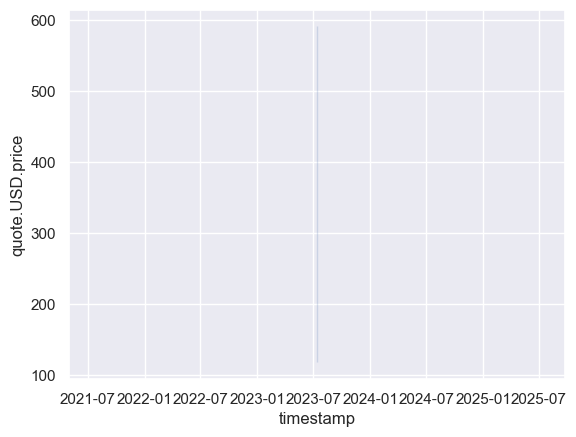

In [59]:
sns.set_theme(style="darkgrid")


sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)